In [2]:
pip install plotly

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
from scipy.stats import pearsonr
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn.preprocessing import scale
from scipy import stats
sns.set_style("darkgrid")
plt.style.use("fivethirtyeight")
import warnings
warnings.filterwarnings('ignore')

In [5]:
bdf = pd.read_csv(r'C:\Users\pc\Downloads\battles.csv')
cddf = pd.read_csv(r'C:\Users\pc\Downloads\character-deaths.csv')

In [6]:
bdf.head()

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,...,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


In [7]:
cddf.head()

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
0,Addam Marbrand,Lannister,NaN,NaN,NaN,56.0,1,1,1,1,1,1,0
1,Aegon Frey (Jinglebell),None,299.0,3.0,51.0,49.0,1,1,0,0,1,0,0
2,Aegon Targaryen,House Targaryen,NaN,NaN,NaN,5.0,1,1,0,0,0,0,1
3,Adrack Humble,House Greyjoy,300.0,5.0,20.0,20.0,1,1,0,0,0,0,1
4,Aemon Costayne,Lannister,NaN,NaN,NaN,NaN,1,1,0,0,1,0,0


In [8]:
bdf.describe()

,year,battle_number,defender_3,defender_4,major_death,major_capture,attacker_size,defender_size,summer
count,38.000000,38.000000,0.0,0.0,37.000000,37.000000,24.000000,19.000000,37.000000
mean,299.105263,19.500000,NaN,NaN,0.351351,0.297297,9942.541667,6428.157895,0.702703
std,0.689280,11.113055,NaN,NaN,0.483978,0.463373,20283.092065,6225.182106,0.463373
min,298.000000,1.000000,NaN,NaN,0.000000,0.000000,20.000000,100.000000,0.000000
25%,299.000000,10.250000,NaN,NaN,0.000000,0.000000,1375.000000,1070.000000,0.000000
50%,299.000000,19.500000,NaN,NaN,0.000000,0.000000,4000.000000,6000.000000,1.000000
75%,300.000000,28.750000,NaN,NaN,1.000000,1.000000,8250.000000,10000.000000,1.000000
max,300.000000,38.000000,NaN,NaN,1.000000,1.000000,100000.000000,20000.000000,1.000000


In [9]:
cddf.describe()

,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
count,305.000000,307.000000,299.000000,905.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,299.157377,2.928339,40.070234,28.861878,0.828790,0.468920,0.272628,0.353326,0.424209,0.272628,0.284624
std,0.703483,1.326482,20.470270,20.165788,0.376898,0.499305,0.445554,0.478264,0.494492,0.445554,0.451481
min,297.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,299.000000,2.000000,25.500000,11.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,299.000000,3.000000,39.000000,27.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,300.000000,4.000000,57.000000,43.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,300.000000,5.000000,80.000000,80.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
bdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                38 non-null     object 
 1   year                38 non-null     int64  
 2   battle_number       38 non-null     int64  
 3   attacker_king       36 non-null     object 
 4   defender_king       35 non-null     object 
 5   attacker_1          38 non-null     object 
 6   attacker_2          10 non-null     object 
 7   attacker_3          3 non-null      object 
 8   attacker_4          2 non-null      object 
 9   defender_1          37 non-null     object 
 10  defender_2          2 non-null      object 
 11  defender_3          0 non-null      float64
 12  defender_4          0 non-null      float64
 13  attacker_outcome    37 non-null     object 
 14  battle_type         37 non-null     object 
 15  major_death         37 non-null     float64
 16  major_capt

In [11]:
cddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 917 entries, 0 to 916
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                917 non-null    object 
 1   Allegiances         917 non-null    object 
 2   Death Year          305 non-null    float64
 3   Book of Death       307 non-null    float64
 4   Death Chapter       299 non-null    float64
 5   Book Intro Chapter  905 non-null    float64
 6   Gender              917 non-null    int64  
 7   Nobility            917 non-null    int64  
 8   GoT                 917 non-null    int64  
 9   CoK                 917 non-null    int64  
 10  SoS                 917 non-null    int64  
 11  FfC                 917 non-null    int64  
 12  DwD                 917 non-null    int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 93.3+ KB


In [12]:
pd.melt(frame = bdf, id_vars = 'year',value_vars = 'name')

,year,variable,value
0,298,name,Battle of the Golden Tooth
1,298,name,Battle at the Mummer's Ford
2,298,name,Battle of Riverrun
3,298,name,Battle of the Green Fork
4,298,name,Battle of the Whispering Wood
5,298,name,Battle of the Camps
6,298,name,Sack of Darry
7,299,name,Battle of Moat Cailin
8,299,name,Battle of Deepwood Motte
9,299,name,Battle of the Stony Shore


In [13]:
bdf.corr().style.background_gradient(cmap='Reds')

,year,battle_number,defender_3,defender_4,major_death,major_capture,attacker_size,defender_size,summer
year,1.000000,0.906781,nan,nan,-0.341050,-0.166234,0.155841,-0.366048,-0.841912
battle_number,0.906781,1.000000,nan,nan,-0.270421,-0.105225,0.086418,-0.297730,-0.799090
defender_3,nan,nan,nan,nan,nan,nan,nan,nan,nan
defender_4,nan,nan,nan,nan,nan,nan,nan,nan,nan
major_death,-0.341050,-0.270421,nan,nan,1.000000,0.264464,0.267966,0.081815,0.337136
major_capture,-0.166234,-0.105225,nan,nan,0.264464,1.000000,0.331961,0.249510,0.142112
attacker_size,0.155841,0.086418,nan,nan,0.267966,0.331961,1.000000,-0.112118,-0.273054
defender_size,-0.366048,-0.297730,nan,nan,0.081815,0.249510,-0.112118,1.000000,0.347108
summer,-0.841912,-0.799090,nan,nan,0.337136,0.142112,-0.273054,0.347108,1.000000


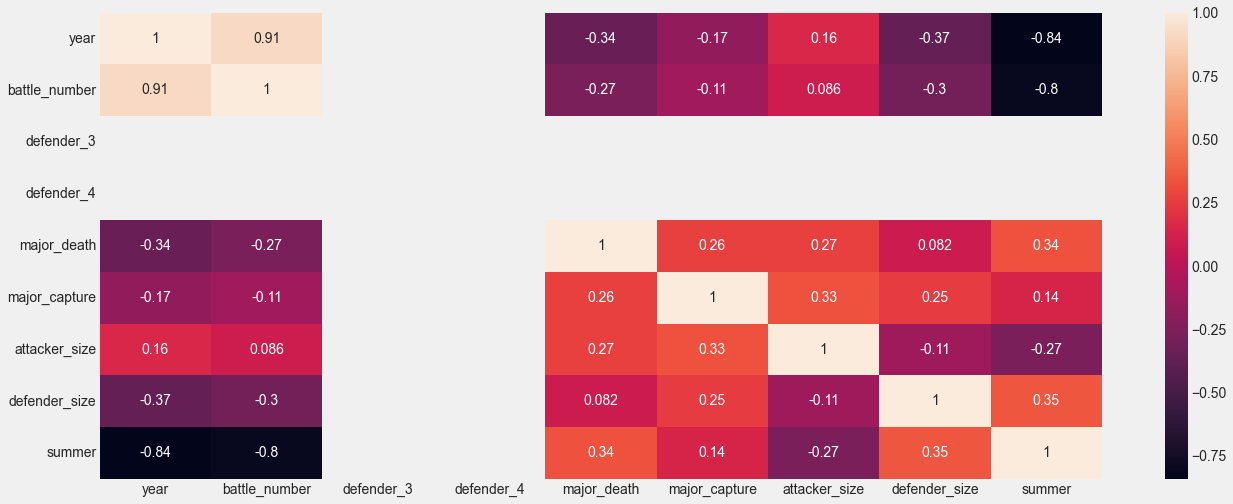

In [14]:
fig,ax=plt.subplots(figsize=(20,8))
sns.heatmap(bdf.corr(),annot=True);

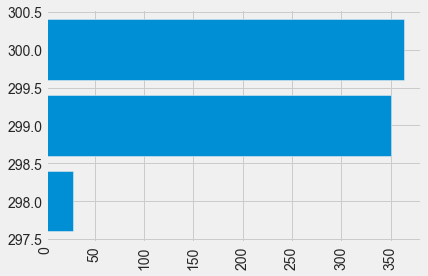

In [15]:
bpy=bdf.groupby('year',as_index=False).sum()
plt.barh(bpy['year'],bpy['battle_number'])
plt.xticks(rotation=90);

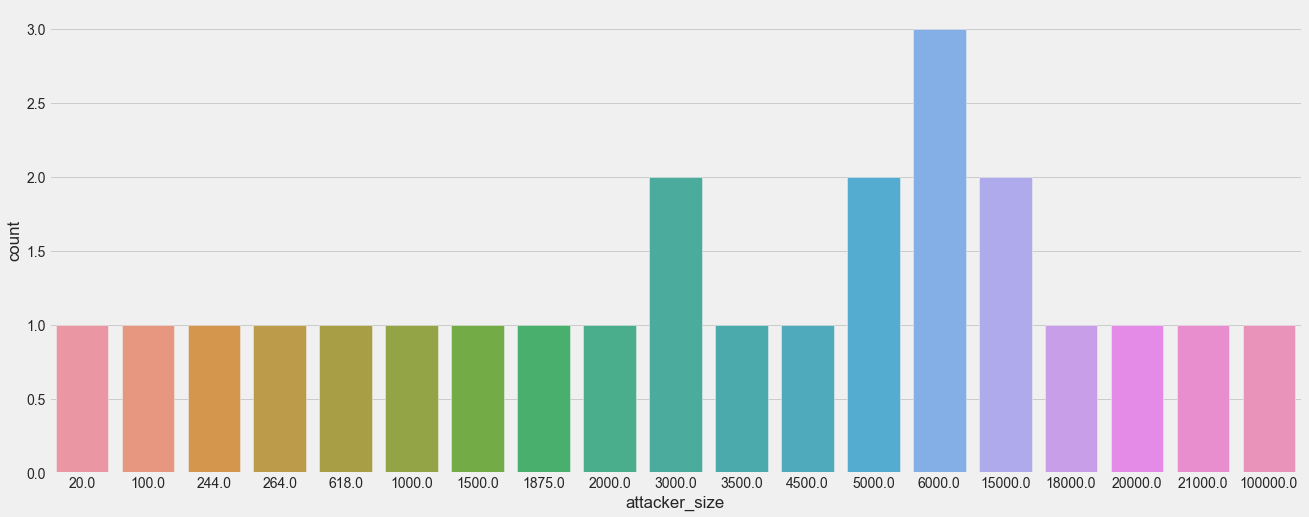

In [16]:
plt.figure(figsize=(20,8))
sns.countplot(bdf['attacker_size']);

<AxesSubplot:>

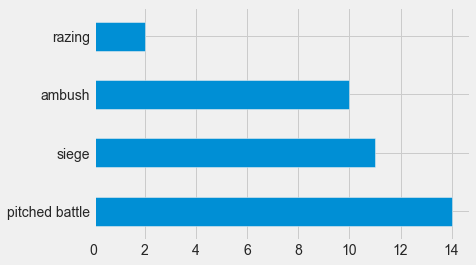

In [17]:
bdf['battle_type'].value_counts().plot(kind = 'barh')

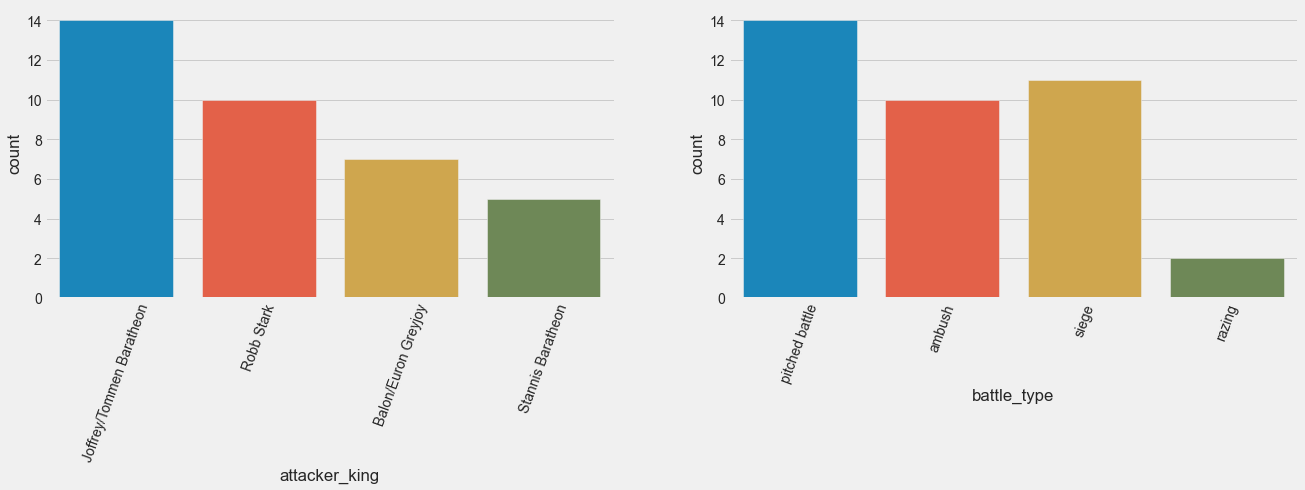

In [18]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(bdf['attacker_king'])
plt.xticks(rotation=70)
plt.subplot(1,2,2)
sns.countplot(bdf['battle_type']);
plt.xticks(rotation=70);

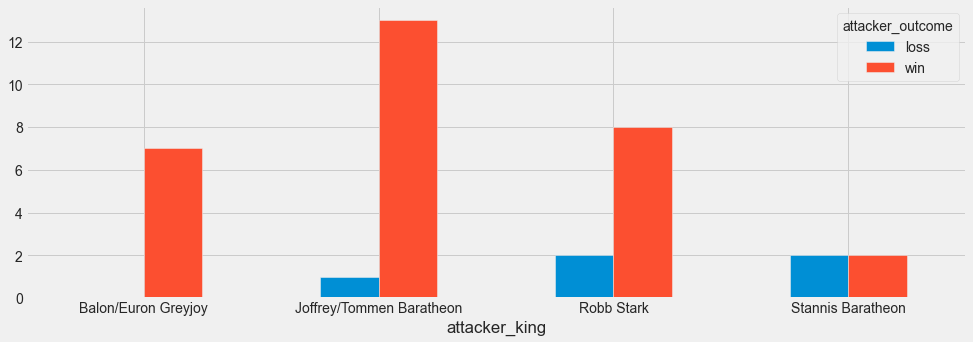

In [19]:
pd.crosstab(bdf['attacker_king'],bdf['attacker_outcome']).plot(kind='bar',figsize=(15,5));
plt.xticks(rotation='horizontal');

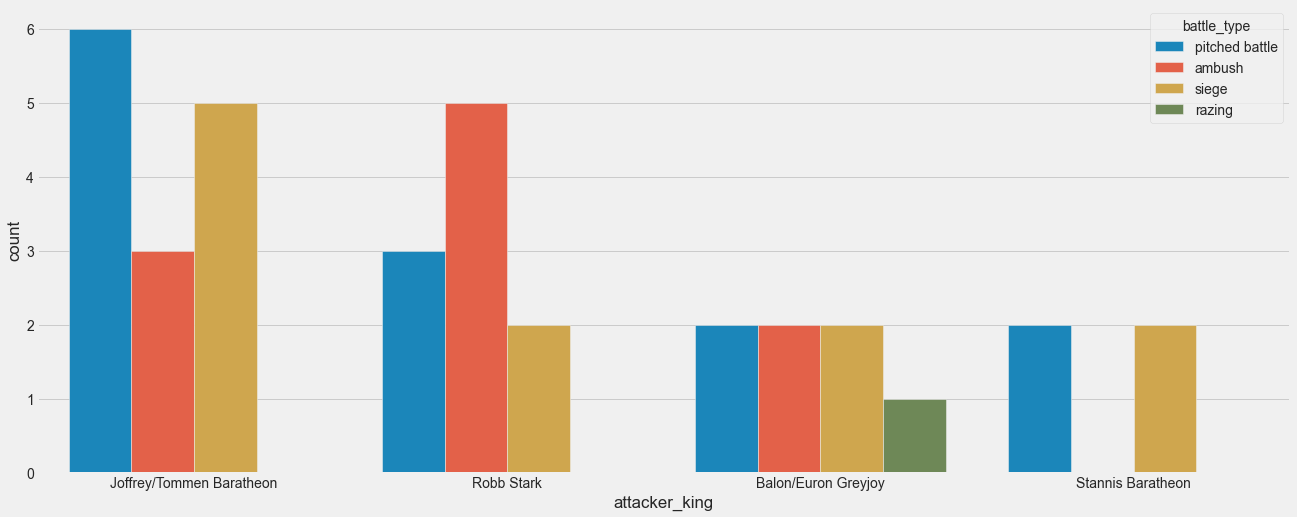

In [20]:
#find attacjer king and battles type
plt.figure(figsize=(20,8))
sns.countplot(bdf['attacker_king'],hue=bdf['battle_type']);

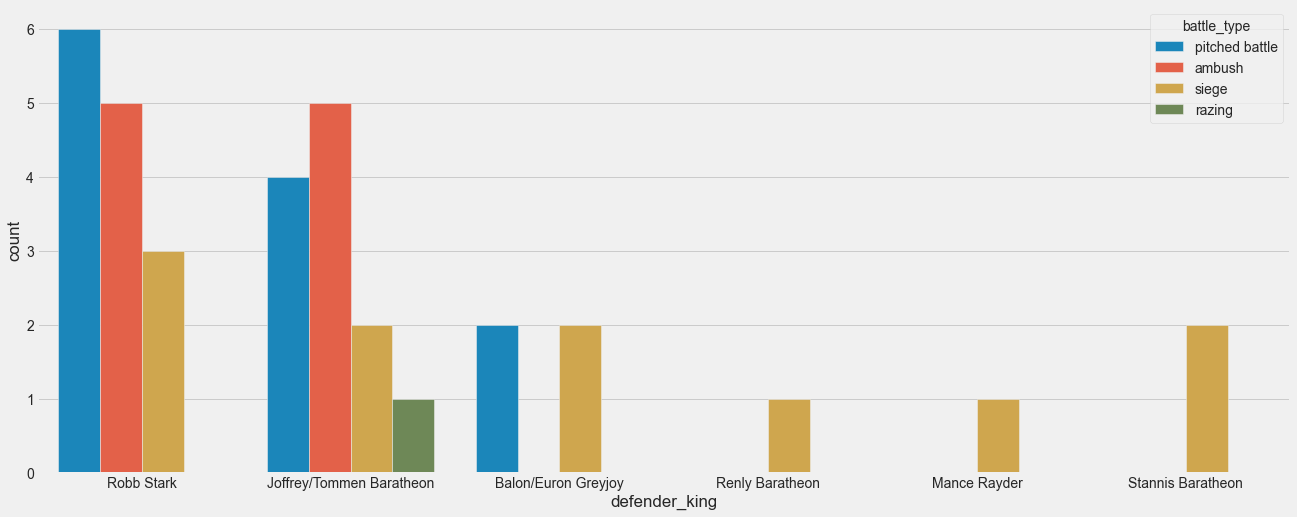

In [21]:
#find attacjer king and battles type
plt.figure(figsize=(20,8))
sns.countplot(bdf['defender_king'],hue=bdf['battle_type']);

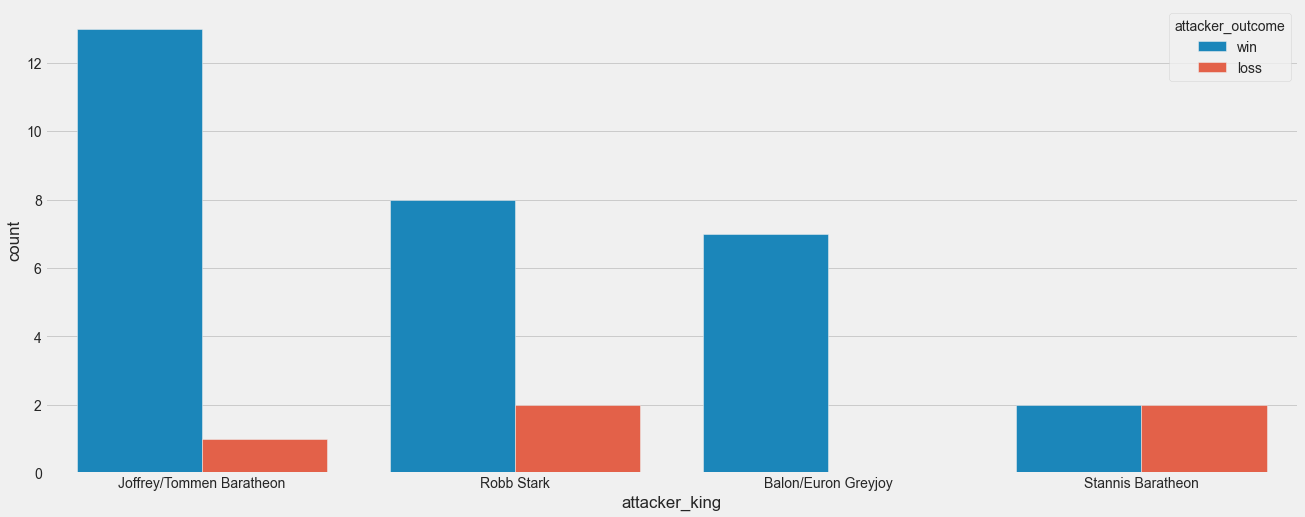

In [22]:
plt.figure(figsize=(20,8))
sns.countplot(bdf['attacker_king'],hue=bdf['attacker_outcome']);

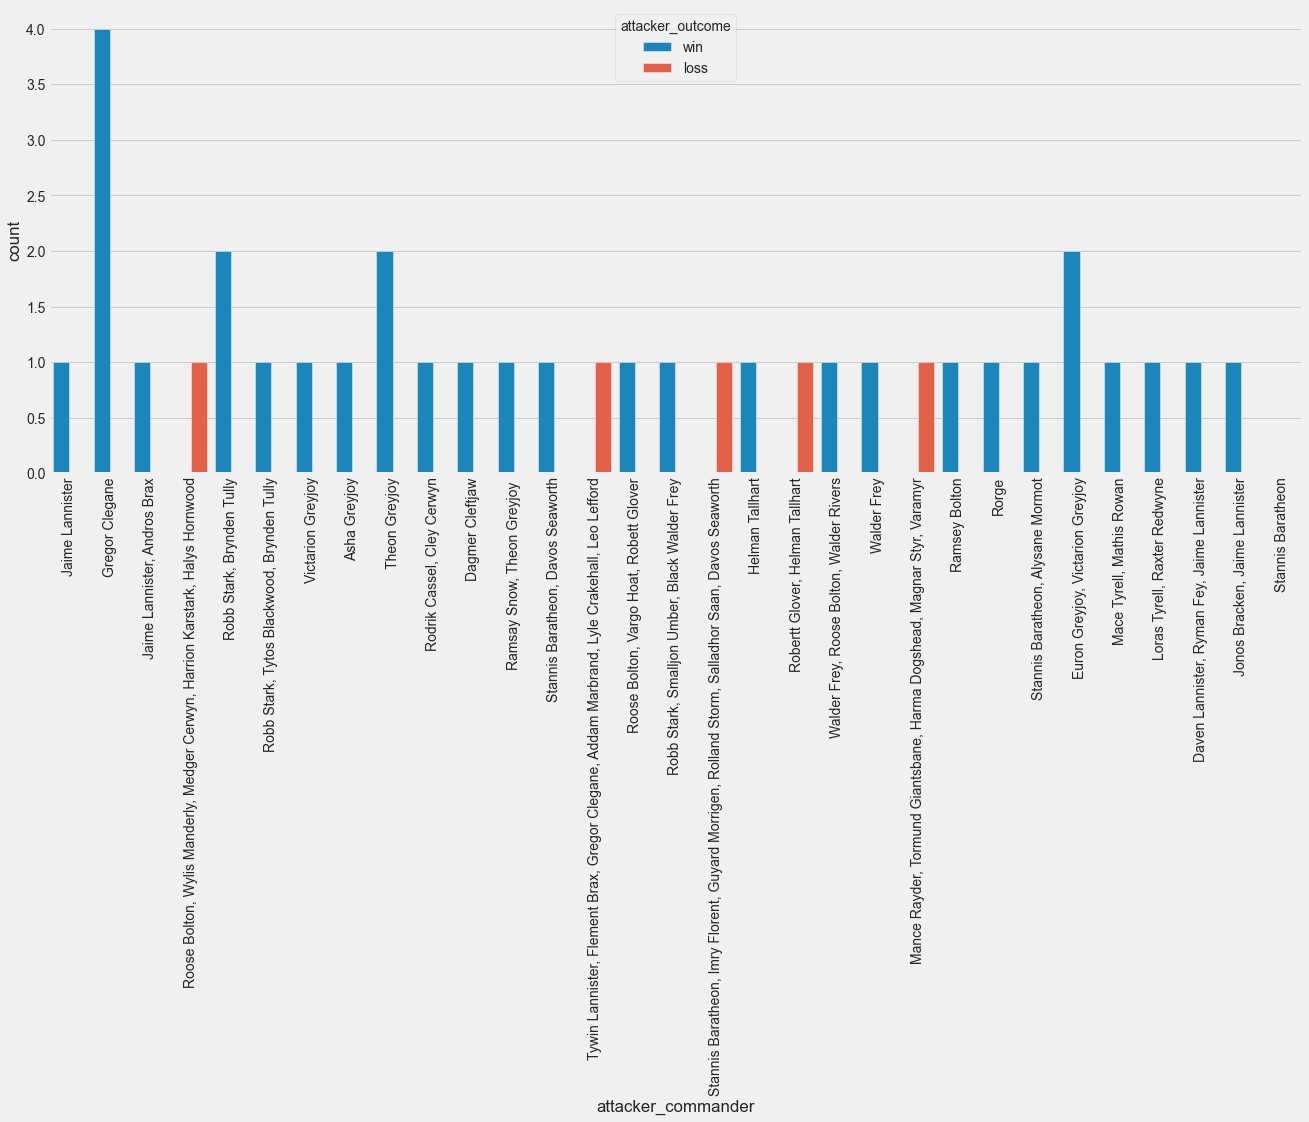

In [23]:
plt.figure(figsize=(20,8))
sns.countplot(bdf['attacker_commander'],hue=bdf['attacker_outcome']);
plt.xticks(rotation=90);

In [24]:
bdf.loc[:, "totaldefender"] = (4 - bdf[["defender_1", "defender_2", "defender_3", "defender_4"]].isnull().sum(axis = 1))
bdf.loc[:, "totalattacker"] = (4 - bdf[["attacker_1", "attacker_2", "attacker_3", "attacker_4"]].isnull().sum(axis = 1))
bdf.loc[:, "totalcommon"] = [len(x) if type(x) == list else np.nan for x in bdf.attacker_commander.str.split(",")]

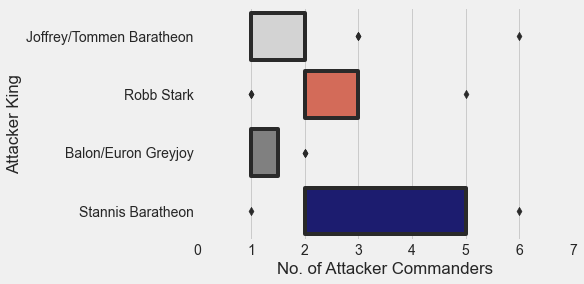

In [25]:
p = sns.boxenplot("totalcommon", "attacker_king", data = bdf, saturation = .6,palette = ["lightgray", sns.color_palette()[1], "grey", "darkblue"])
_ = p.set(xlabel = "No. of Attacker Commanders", ylabel = "Attacker King", xticks = range(8))

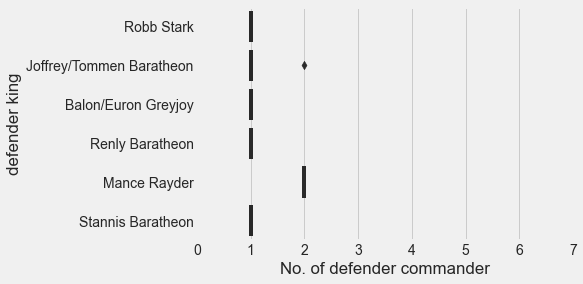

In [26]:
p = sns.boxenplot("totaldefender", "defender_king", data = bdf, saturation = .6,palette = ["lightgray", sns.color_palette()[1], "grey", "darkblue"])
_ = p.set(xlabel = "No. of defender commander", ylabel = "defender king", xticks = range(8))

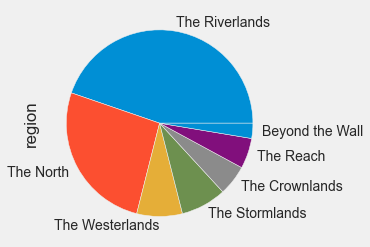

In [27]:
bdf['region'].value_counts().plot(kind = 'pie');

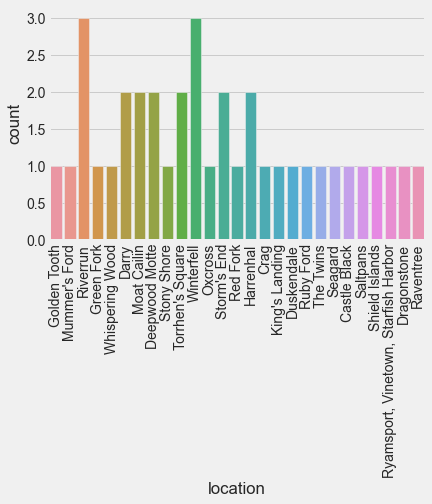

In [28]:
sns.countplot(x=bdf['location'])
plt.xticks(rotation=90);

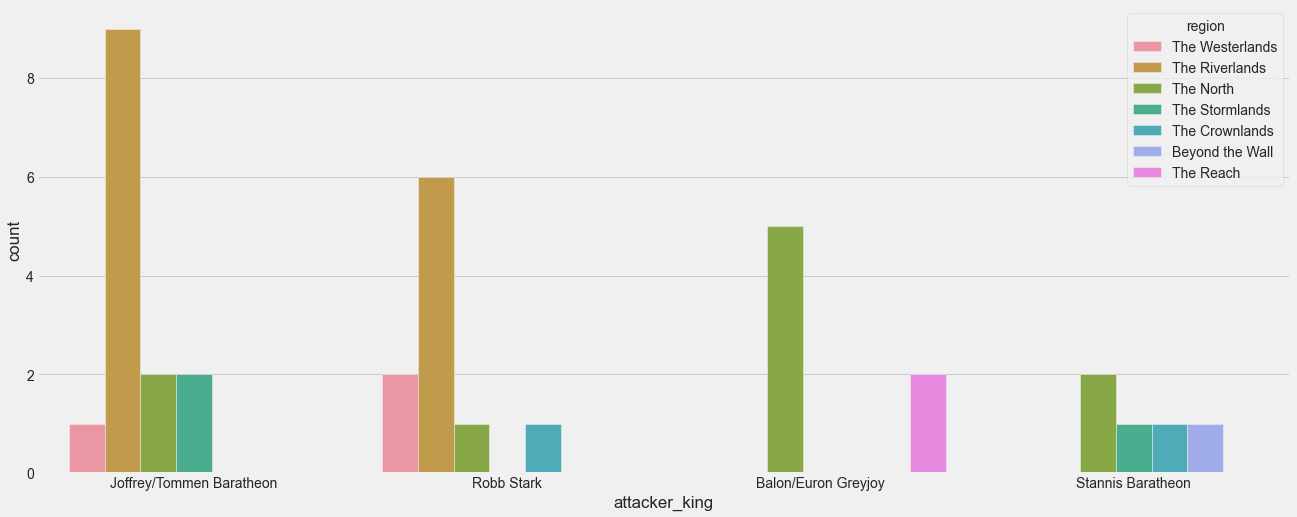

In [29]:
plt.figure(figsize=(20,8))
sns.countplot(bdf['attacker_king'],hue=bdf['region']);

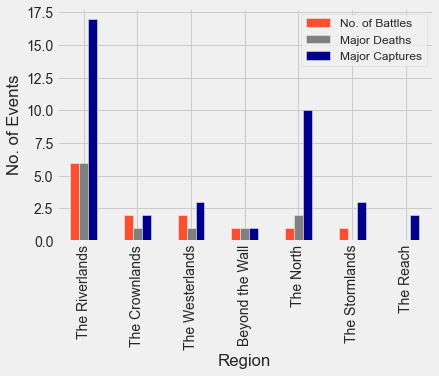

In [30]:
data = bdf.groupby("region").sum()[["major_death", "major_capture"]]
p = pd.concat([data, bdf.region.value_counts().to_frame()], axis = 1).sort_values("major_death", ascending = False).copy(deep = True).plot.bar(color = [sns.color_palette()[1], 
"grey", "darkblue"], rot = 0)
_ = p.set(xlabel = "Region", ylabel = "No. of Events"), p.legend(["No. of Battles", "Major Deaths", "Major Captures"], fontsize = 12.)
plt.xticks(rotation=90);

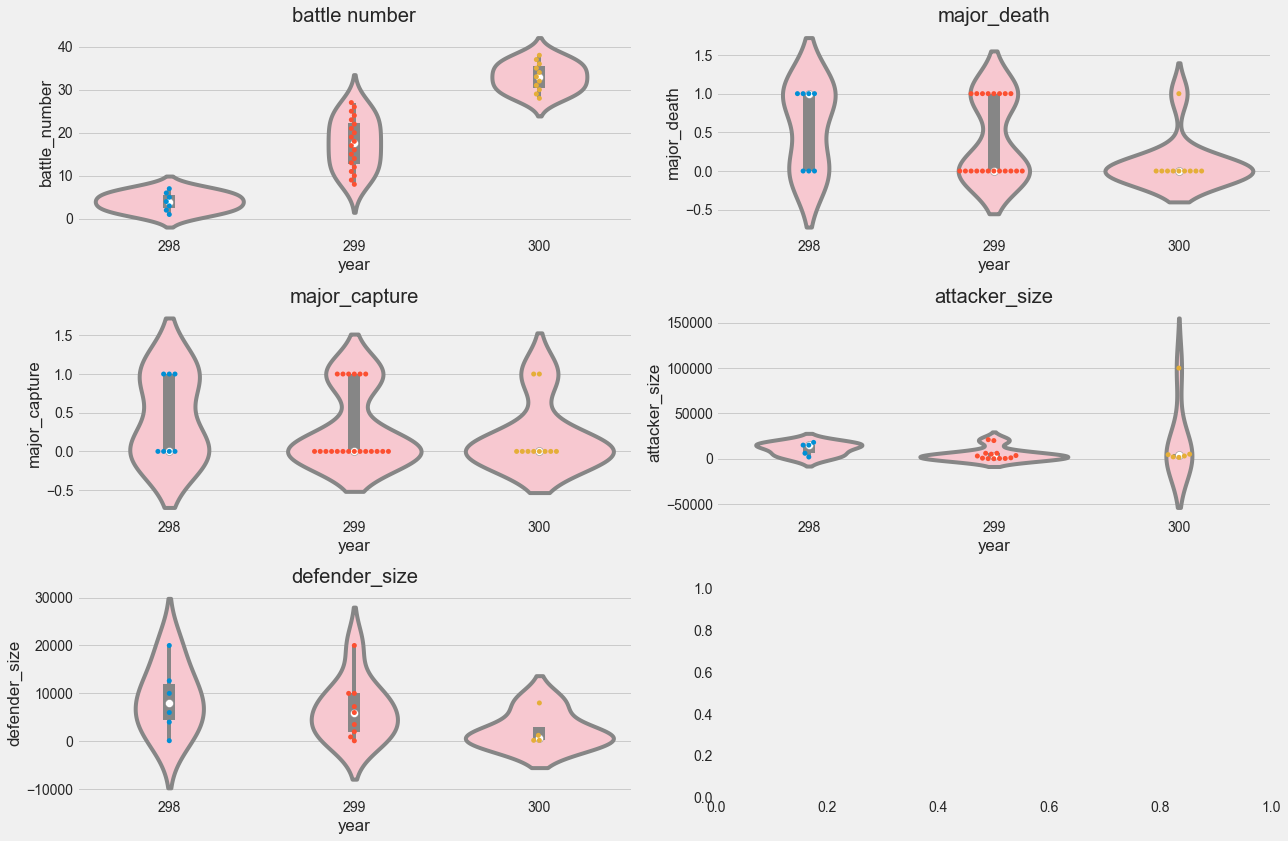

In [31]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 12))
sns.violinplot(x="year", y="battle_number", data=bdf,color = 'pink',ax=axes[0][0]).set_title('battle number')
sns.swarmplot(x="year", y="battle_number", data=bdf,ax = axes[0][0])

sns.violinplot(x="year", y="major_death", data=bdf,color = 'pink',ax=axes[0][1]).set_title('major_death')
sns.swarmplot(x="year", y="major_death", data=bdf,ax = axes[0][1])

sns.violinplot(x="year", y="major_capture", data=bdf,color = 'pink',ax=axes[1][0]).set_title('major_capture')
sns.swarmplot(x="year", y="major_capture", data=bdf,ax = axes[1][0])

sns.violinplot(x="year", y="attacker_size", data=bdf,color = 'pink',ax=axes[1][1]).set_title('attacker_size')
sns.swarmplot(x="year", y="attacker_size", data=bdf,ax = axes[1][1])

sns.violinplot(x="year", y="defender_size", data=bdf,color = 'pink',ax=axes[2][0]).set_title('defender_size')
sns.swarmplot(x="year", y="defender_size", data=bdf,ax = axes[2][0])


plt.grid()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=1)
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()